In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML

#- importing used libraries 

In [ ]:
df=pd.read_csv("Loan Prediction.csv")
#reading file

In [ ]:
df.head(10)
# view first 10 rows to get a feel of data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
df.info()
# Get info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.drop('Loan_ID', inplace=True, axis='columns')


- ID column is not needed in classification of data

In [ ]:
df.isnull().sum()


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#- Get number of nulls

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)
#---------------------------------------------------------------------------------------#
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace = True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)

# - Replace nulls with most common value in Discrete Columns
# - Replace nulls with average values in Continous columns

In [ ]:
df.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# - Check if any nulls are left

In [ ]:
df['Property_Area'] = df['Property_Area'].map({'Urban':0, 'Semiurban':1 , 'Rural':2}).astype(int)
df['Loan_Status'] = df['Loan_Status'].map({'N':0,'Y':1}).astype(int)
df['Dependents'] = df['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})



#- Anyone who has more than 3 children are considered 3
#- "Replace written data with numerical ones for visualisation"

In [ ]:
df['All_Money'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.drop(['ApplicantIncome', 'CoapplicantIncome'], axis='columns', inplace=True)


#- All money input is calculated "As the Bank only Cares for the sum of Credit"
#- For the same reason no need for the other 2 money columns so they're dropped

In [ ]:
df['Gender'] = df['Gender'].map({'Male':0,'Female':1}).astype(int)
df['Education'] = df['Education'].map({'Not Graduate':0,'Graduate':1}).astype(int)
df['Credit_History'] = df['Credit_History'].astype(int) 
df['Married'] = df['Married'].map({'No':0,'Yes':1}).astype(int)
df['Self_Employed'] = df['Self_Employed'].map({'No':0,'Yes':1}).astype(int)




#- Changing all data to numbers to be used in visualisation

In [ ]:
df.All_Money.min()

1442.0

In [ ]:
df.All_Money.max()

81000.0

In [ ]:
def All_Money_cat(x):
    'divide All_-money into 5 categories'
    if x < 16000:
        return "Class C"
    elif 16000 <= x < 32000:
         return "Class B"
    elif 32000 <= x < 48000:
        return "Class A"
    elif 48000 <= x < 64000:
        return "Class Elite"
    elif x >= 64000:
       return "Class Naguib Saweris"
    else:
        return "Illegal"

df['All_Money_cat'] = df.All_Money.apply(lambda x: All_Money_cat(x))

In [ ]:
df.LoanAmount.min()

9.0

In [ ]:
df.LoanAmount.max()

700.0

In [ ]:
def Loan_Cat(x):
    'divide into Loan_Amount 5 categories'
    if x < 140:
        return "Bronze"
    elif 140 <= x < 280:
         return "Silver"
    elif 280 <= x < 420:
        return "Gold"
    elif 420 <= x < 560:
        return "Platinum"
    elif x >= 560:
       return "Supreme"
    else:
        return "Illegal"

df['Loan_Cat'] = df.LoanAmount.apply(lambda x: Loan_Cat(x))


#- Categorize people into Groups According to their Bank credit to know which category applies for more loans 

#- Categorize Loans into Groups According to their amounts to know which category is most applied for

<AxesSubplot:xlabel='All_Money_cat', ylabel='count'>

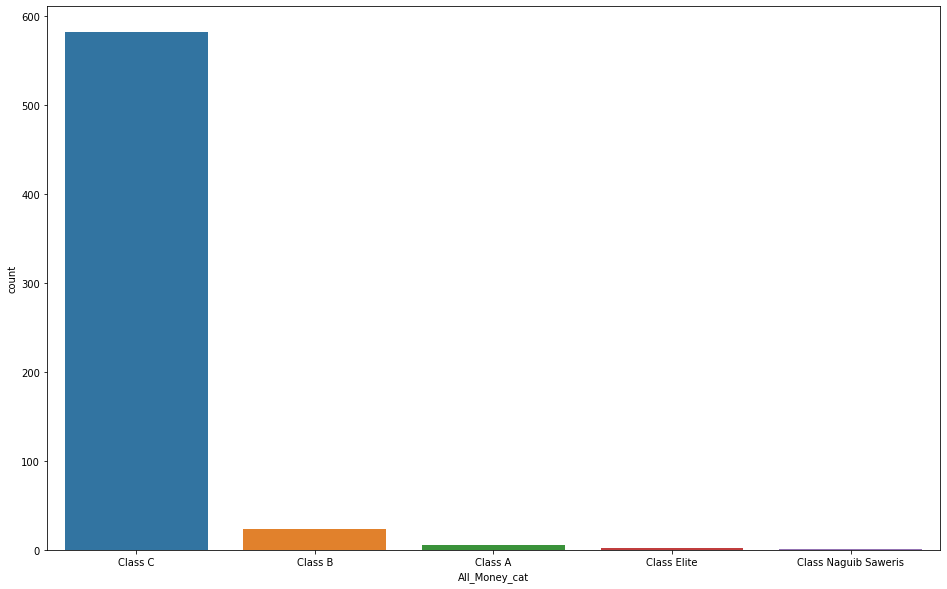

In [ ]:
fig,ax = plt.subplots(figsize=(16,10))
sns.countplot(x='All_Money_cat', data = df)



# -Most common category (Class C)

In [ ]:
class_A = df[df['All_Money_cat']=='Class A']

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

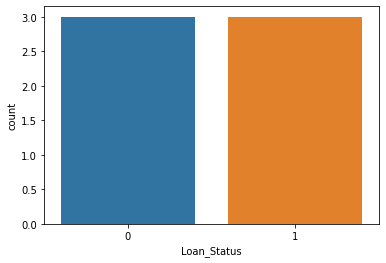

In [ ]:
sns.countplot(x='Loan_Status',data = class_A)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

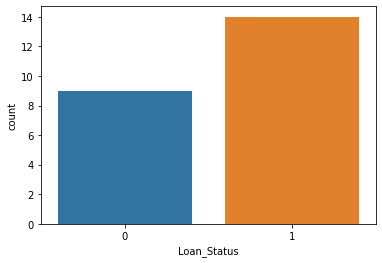

In [ ]:
sns.countplot(x='Loan_Status',data =df[df['All_Money_cat']=='Class B'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

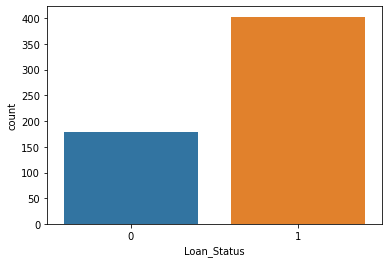

In [ ]:
sns.countplot(x='Loan_Status',data =df[df['All_Money_cat']=='Class C'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

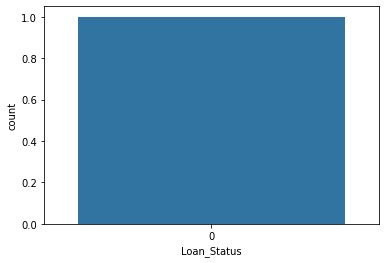

In [ ]:
sns.countplot(x='Loan_Status',data =df[df['All_Money_cat']=='Class Naguib Saweris'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

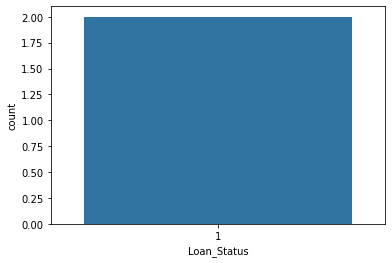

In [ ]:
sns.countplot(x='Loan_Status',data =df[df['All_Money_cat']=='Class Elite'])

- Rejected = Accepted in Class A
- Rejected > Accepted in Class B
- Rejected > Accepted in Class C
- All Applications were Rejected in Class Naguib Saweris
- All Applications were Accepted in Class Elite

#- The Bank needs to focus in their  Loan promotions on Classes B & C

<AxesSubplot:xlabel='Loan_Cat', ylabel='count'>

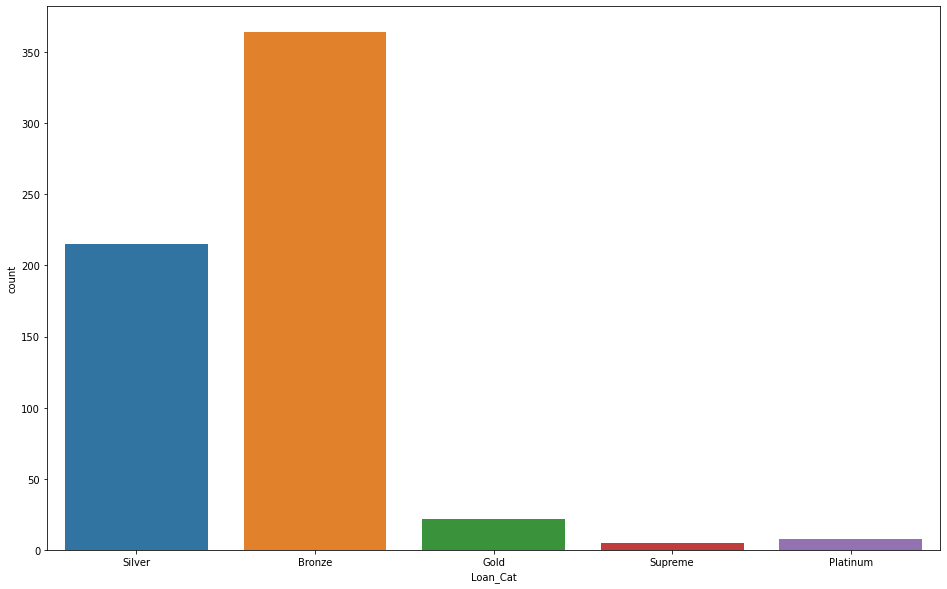

In [ ]:
fig,ax = plt.subplots(figsize=(16,10))
sns.countplot(x='Loan_Cat', data = df)

- Most common Loan category (Bronze)
# - The Bank needs to focus on promotions to Loans less than 140 $

<AxesSubplot:xlabel='Dependents', ylabel='count'>

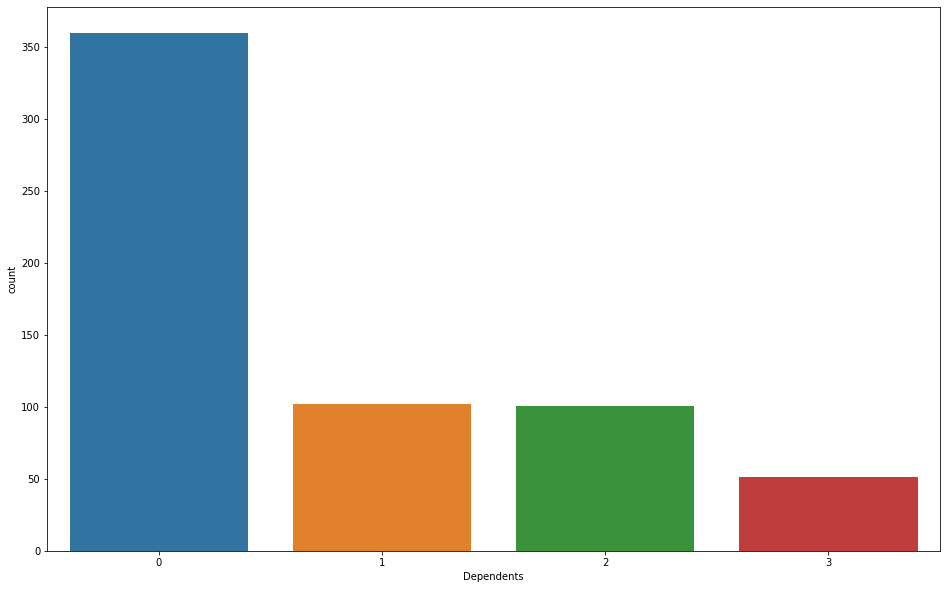

In [ ]:
fig,ax = plt.subplots(figsize=(16,10))
sns.countplot(x='Dependents', data = df)

- People with no Dependants are most likely to apply for a Loan 
#- Bank should focus on Youth loans 

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

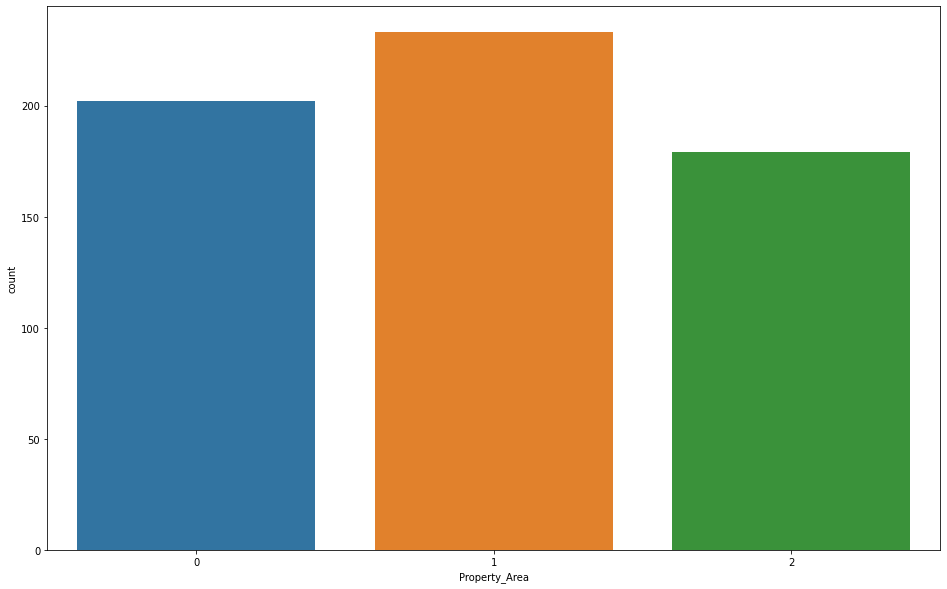

In [ ]:
fig,ax = plt.subplots(figsize=(16,10))
sns.countplot(x='Property_Area', data = df)

In [ ]:
def pie_chart(dataframe):
    """
    creates a pie chart
    input: dataframe with a 'category' as index and a numerical column
    output: pie chart
    """
    labels = dataframe.index.values
    sizes = dataframe['Status'].values
        
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

- Most common category is Semi-Urban 
#- Bank Should Apply promotions and open new Branches in these Areas



In [ ]:

df1 = pd.DataFrame(df.Loan_Status.value_counts())
pie_chart(df1)

KeyError: ignored

In [ ]:
df1 = pd.DataFrame(df.Gender.value_counts())
pie_chart(df1)

In [ ]:
df1 = pd.DataFrame(df.Married.value_counts())
pie_chart(df1)

In [ ]:
df1 = pd.DataFrame(df.Education.value_counts())
pie_chart(df1)

In [ ]:
df1 = pd.DataFrame(df.Self_Employed.value_counts())
pie_chart(df1)

In [ ]:
df1 = pd.DataFrame(df.Credit_History.value_counts())
pie_chart(df1)

-Most Loan Applications Are Approved by nearly 2:1 (exactly 2.19)

-Most Loan Applications Are issued by Males compared to Females by  4.5:1 (exactly 4.49)

-Most Loan Applications Are issued by Married individuals compared to Singles  by  nearly 2:1  (exactly 1.88)

-Most Loan Applications Are issued by Educated individuals compared to Ignorant  by  nearly   3.5 : 1 

-Most Loan Applications Are issued by Employees individuals compared to Self Employed  by  nearly   6.5 : 1 exactly 6.4

-Most Loan Applications Are issued by Certified Ceditable individuals compared to Self Uncertified  by  nearly   6 : 1 exactly 5.9

#- Bank should target Young Educated Married Males who work in companies with Credible history , not forgetting that they shouldn't have children (refer to Dependancies Diagram)

In [ ]:
sns.jointplot(x='Gender',y='LoanAmount',data=df,kind='scatter')

- Males apply for more Loan Amounts than females 700 : 600
(Another Reason for targeting Males rather than females )

In [ ]:
df.head()


# - Since a whole class was rejected "Class Naguib Saweres" (refer to previous diagrams ) we need  a new Feature that May predict  if a user applies for a loan depending on his / her current statues it might be accepted or not 

#- It can be Added to the Bank Mobile app or on the Web site 

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['Loan_Cat','All_Money_cat','Loan_Status'], axis=1)
y=df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =  83)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state =83 ,max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=83)

In [ ]:
y_pred = classifier.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[ 13  25]
 [  2 114]]


In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.34      0.49        38
           1       0.82      0.98      0.89       116

    accuracy                           0.82       154
   macro avg       0.84      0.66      0.69       154
weighted avg       0.83      0.82      0.79       154



- since we need a discrete answer (yes/no) a linear regression model will not be of use , so a Classification model (Logistic Regression) is more prefferable 

#- Finally :
 - our New Feature can Predict by an accurcy of 82% that wether a customer loan is accepted or not reducing time & efffort for both the Bank Teller & the Customer

 - Having 82% accuracy on spot is way better than a Bank Teller who'll need Access to classified info which he may or may not aquire that will definitly affect the teller's judgment .